In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

## **TransJakarta Passengers 2021**

Dataset ini berisikan informasi mengenai data penumpang dan rute yang dilalui TransJakarta 2021.
<br><br>
Terdapat 6 kolom yang ada pada dataset ini, yaitu:
- tahun: year of the data is collected.
- bulan: month of the data is collected.
- jenis: type of vehicle.
- kode_trayek: route code.
- trayek: route.
- jumlah_penumpang: the number of passengers.

1. Numerical: jumlah_penumpang
2. Categorical:
    - ordinal:
    - nominal:

In [53]:
df = pd.read_csv(r'D:\purwadhika\modul2\CapstoneProject2\data\raw\TransJakarta Passengers 2021.csv')
df

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883
4,2021,10,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,66616
...,...,...,...,...,...,...
1468,2021,11,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,11353
1469,2021,11,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,59155
1470,2021,11,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,34498
1471,2021,11,Angkutan Umum Integrasi,GR4,Taman Kota Intan - Museum Bahari,4


In [54]:
#jumlah baris dan kolom
df.shape

(1473, 6)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tahun             1473 non-null   int64 
 1   bulan             1473 non-null   int64 
 2   jenis             1473 non-null   object
 3   kode_trayek       1473 non-null   object
 4   trayek            1471 non-null   object
 5   jumlah_penumpang  1473 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 69.2+ KB


In [56]:
#describe numerical type
df.describe()

,tahun,bulan,jumlah_penumpang
count,1473.0,1473.000000,1.473000e+03
mean,2021.0,6.534963,8.167586e+04
std,0.0,3.446451,1.265331e+05
min,2021.0,1.000000,0.000000e+00
25%,2021.0,4.000000,2.501600e+04
50%,2021.0,7.000000,4.962800e+04
75%,2021.0,10.000000,7.513800e+04
max,2021.0,12.000000,1.131439e+06


In [57]:
# describe non-numerical type
df.describe(include='object')

,jenis,kode_trayek,trayek
count,1473,1473,1471
unique,3,135,136
top,Mikrotrans,JAK.88,Cililitan - Condet via Kayu Manis
freq,848,12,24


In [58]:
# Cek data type, null value, unique value for each variable
pd.set_option('max_colwidth',None)
pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

,feature,data_type,null_value,n_unique,sample_unique
0,tahun,int64,0.000000,1,[2021]
1,bulan,int64,0.000000,12,"[10, 8, 3, 6, 1, 5, 12, 9, 2, 7, 4, 11]"
2,jenis,object,0.000000,3,"[Mikrotrans, BRT, Angkutan Umum Integrasi]"
3,kode_trayek,object,0.000000,135,"[JAK.88, JAK.85, JAK.84, JAK.80, JA.77, JAK.75, JAK.74, JAK.73, JAK.72, JAK.71, JAK.64, JAK.61, JAK.60, JAK.59, JAK.58, JAK.56, JAK.54, JAK.53, JAK.52, JAK.51, JAK.50, JAK.49, JAK.47, JAK.46, JAK.45, JAK.44, JAK.43, JAK.42, JAK.41, JAK.40, JAK.39, JAK.38, JAK.37, JAK.36, JAK.35, JAK.34, JAK.33, JAK.32, JAK.31, JAK.30, JAK.29, JAK.28, JAK.27, JAK.26, JAK.25, JAK.24, JAK.22, JAK.21, JAK.20, JAK,19, JAK.18, JAK.17, JAK.16, JAK.15, JAK.14, JAK.13, JAK.12, JAK.117, JAK.112, JAK.11, JAK.10, JAK.09, JAK.08, JAK.07, JAK.06, JAK.05, JAK.04, JAK.03, JAK.02, JAK.01, 9, 8, 7, 6, 5, 4, 3, 2, 13, 12, 11, 10, 1, 9H, 9E, 9D, 8K, 8E, 8D, 8C, 7P, 7D, 7B, 7A, 6R, 6N, 6M, 6H, 6C, 5M, ...]"
4,trayek,object,0.135777,136,"[Terminal Tanjung Priok - Ancol Barat, Bintara - Cipinang Indah, Terminal Kampung Melayu - Kapin Raya, Rawa Buaya - Rawa Kompeni, Tanjung Priok - Jembatan Item, Cililitan - Kp. Pulo, Terminal Rawamangun - Cipinang Muara, Jambore Cibubur - Pasar Rebo, Kampung Rambutan - Pasar Rebo via Poncol, Kampung Rambutan - Pinang Ranti, Lenteng Agung - Aseli, Cempaka Putih - Pulo Gadung via Kelapa Gading, Kelapa Gading - Rusun Kemayoran, Rawamangun - Tanah Merah, Cilingcing - Rorotan, Grogol - Srengseng, Grogol - Benhil, Grogol - Pos Pengumben via Slipi, Kalideres - Muara Angke, Taman Kota - Budi Luhur, Kalideres - Puri Kembangan, Lebak Bulus - Cipulir, Pasar Minggu - Ciganjur via KB Ragunan, Pasar Minggu - Jagakarsa, Lebak Bulus - Ragunan, Andara - Stasiun Universitas Pancasila, Tongtek - Cililitan, Kampung Melayu - Pondok Kelapa, Kampung Melayu - Ppulo Gadung, Harapan Baru - Pulo Gebang via Rawa Kuning, Kalimalang - Duren Sawit, Bulak Ringin - Kampung Rambutan, Cililitan - Condet via Kayu Manis, Cilangkap - Cililitan, Pangkalan Jati - Rawamangun, Rawamangun - Klender, Pulo Gadung - Kota, Lebak Bulus - Petukangan, Blok M - Andara, Grogol - Meruya via Roxy, Tanjung Priok - Sukapura, Kp. Rambutan - Taman Wiladatika, Pulo Gebang - Rorotan, Rawamangun - Duren Sawit, Kp. Rambutan - Kalisari, Senen - Pulo Gadung via Kelapa Gading, Dwikora - Penas Kalimalang, Cililitan - Dwikora, Cawang UKI - Lubang Buaya, Pinang Ranti - Kampung Rambutan, Kalibata - Kuningan, Senen - Pulo Gadung , Bulak Turi - Tanjung Priok, Tanah Abang - Meruya, Tanah Abang - Kota Intan via Jembatan Lima, Tanah Abang - Kebayoran Lama via Pos Pengumben, Tanjung Priok - Tanah Merdeka, Terminal Tanah Merah - Pulo Gadung, Tanah Abang - Kebayoran Lama , Tanah Abang - Kota , Roxy Mas - Karet, Roxy - Benhil, Tanah Abang - Grogol via Tawakal, Kampung Rambutan - Pondok Gede, Semper - Rorotan, Grogol - Tubagus Angke, Lebak Bulus - Andara, Kampung Melayu - Duren Sawit, Tanjung Priok - Plumpang, Pinang Ranti - Pluit, Lebak Bulus - Harmoni, Kampung Rambutan - Kampung Melayu, Ragunan - Dukuh Atas 2, Kampung Melayu - Ancol, Pulo Gadung 2 - Tosari, Kalideres - Pasar Baru, Pulo Gadung 1 - Harmoni, Ciledug - Tendean, Penjaringan - Sunter Bouleverd Barat, Pulo Gebang - Kampung Melayu, Tanjung Priok - PGC 2, Blok M - Kota, Cipedak - Blok M, Kebayoran Lama - Jelambar, Pasar Minggu - Tanah Abang, Batu Sari-Tanah Abang, Bintaro - Blok M, Joglo - Blok M, Kebayoran Lama - Tanah Abang, Pondok Kelapa - BKN, Pancoran - TMII, Kampung Rambutan - Blok M, Kampung Rambutan - Lebak Bulus, Ragunan - Stasin MRT Fatmawati, Ragunan - Blok M via Kemang, Stasiun Manggarai - Blok M, Senen - Lebak Bulus, Stasin Tebet - Karet via Patra Kuningan, Kampung Melayu - Tanah Abang via Cikini, Kampung Melayu - Tanah Abang, ...]"
5,jumlah_penumpang,int64,0.000000,1420,"[31197, 30711, 40186, 61883, 66616, 50363, 50676, 75846, 97831, 57649, 52926, 35233, 69665, 72106, 91654, 49293, 41815, 46344, 65266, 104140, 69097, 44014, 50597, 83425, 48167, 64885, 94923, 71096, 46177, 41534, 63

<Axes: >

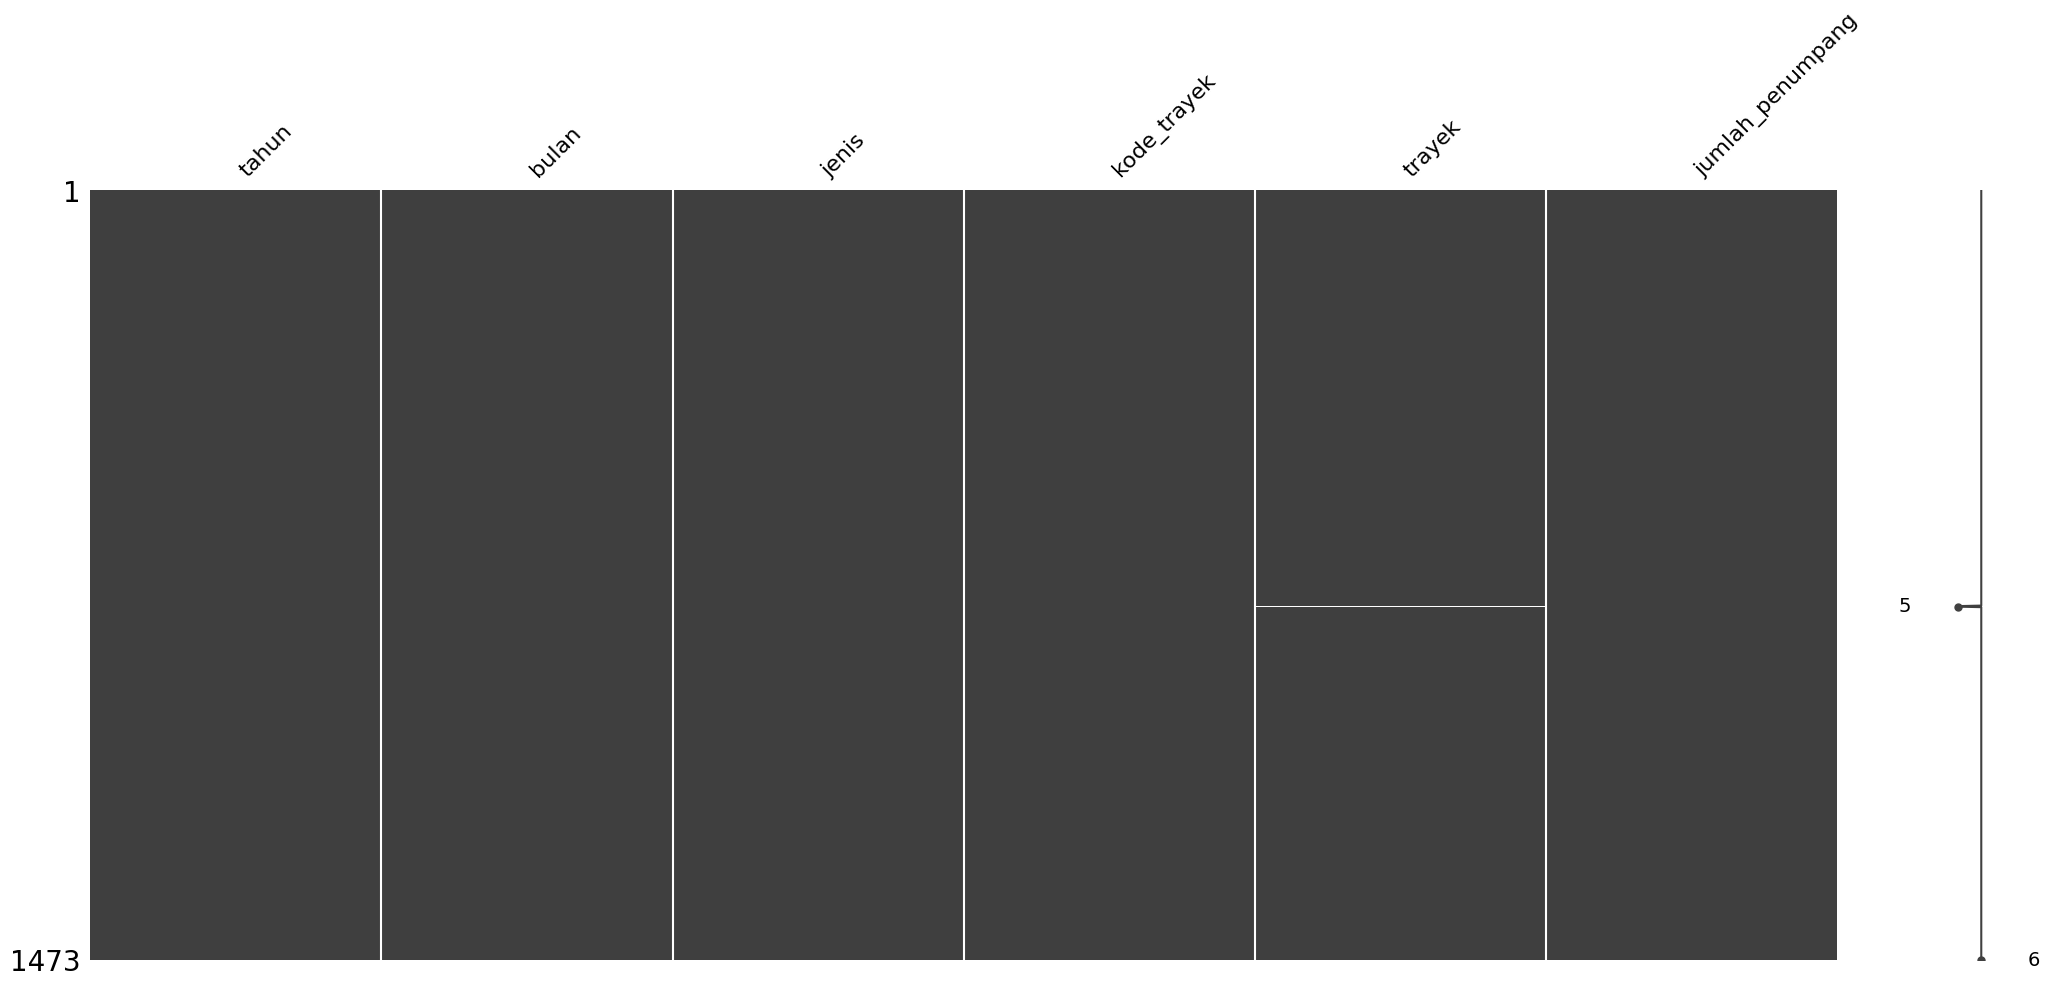

In [59]:
# check missing value with matrix graph
msno.matrix(df)

insight: terdapat 0,1% missing value di kolom trayek

# *Missing Value*

In [60]:
#Melakukan pengecekan terhadap kolom yang masih Null
df.isnull().sum()

tahun               0
bulan               0
jenis               0
kode_trayek         0
trayek              2
jumlah_penumpang    0
dtype: int64

In [61]:
df[df.trayek.isnull()]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
795,2021,12,Mikrotrans,JAK.10B,NaN,4085
796,2021,12,Mikrotrans,JAK.10A,NaN,33992


In [62]:
#Mengisi Kolom Null
dict_trayek = df.dropna(subset=['trayek']).set_index('kode_trayek')['trayek'].to_dict()
df['trayek'] = df['trayek'].fillna(df['kode_trayek'].map(dict_trayek))
df.loc[[795,796],:]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
795,2021,12,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,4085
796,2021,12,Mikrotrans,JAK.10A,Gondangdia - Cikini via Salemba Raya,33992


In [68]:
# Menghapus white space
df['trayek'] = df['trayek'].str.strip()
df['kode_trayek'] = df['kode_trayek'].str.strip()

In [69]:
#cek kode_trayek double
kodeTrayekCounts = df.groupby('kode_trayek')['trayek'].nunique()
print(kodeTrayekCounts[kodeTrayekCounts > 1])

kode_trayek
1A    2
Name: trayek, dtype: int64


In [64]:
# cek trayek double
doubleTrayek = df.groupby('trayek')['kode_trayek'].nunique()
doubleTrayek[doubleTrayek > 1]

trayek
Cililitan - Condet via Kayu Manis         2
PIK - Balai Kota                          2
Sentraland Cengkareng - Puri Kembangan    2
Tanjung Priok - Jembatan Item             2
Name: kode_trayek, dtype: int64

In [65]:
#handling kode trayek yang double
df.loc[(df['kode_trayek'] == '1A') & (df['trayek'] == 'PIK - Balai Kota'), 'trayek'] = 'Pantai Maju - Balai Kota'
df.loc[(df['kode_trayek'] == '3E') & (df['trayek'] == 'Puri Kembangan - Sentraland Cengkareng'), 'trayek'] = 'Sentraland Cengkareng - Puri Kembangan'
df.loc[(df['kode_trayek'] == '4') & (df['trayek'] == 'Pulo Ggadung 2 - Tosari'), 'trayek'] = 'Pulo Gadung 2 - Tosari'
df.loc[(df['kode_trayek'] == 'JAK.01') & (df['trayek'] == 'Ttanjung Priok - Plumpang'), 'trayek'] = 'Tanjung Priok - Plumpang'
df.loc[(df['kode_trayek'] == 'JAK.41') & (df['trayek'] == 'Kampung Melayu - Ppulo Gadung'), 'trayek'] = 'Kampung Melayu - Pulo Gadung'
df.loc[(df['kode_trayek'] == 'JAK.16') & (df['trayek'] == 'Cililitan - Condet via Kayu Manis'), 'trayek'] = 'Cililitan - Condet'
df.loc[(df['trayek'] == 'Tanjung Priok - Jembatan Item') & (df['kode_trayek'] == 'JA.77'), 'kode_trayek'] = 'JAK.77'

In [66]:
#cek kode_trayek double
kodeTrayekCounts = df.groupby('kode_trayek')['trayek'].nunique()
print(kodeTrayekCounts[kodeTrayekCounts > 1])

Series([], Name: trayek, dtype: int64)


In [67]:
# cek trayek double
doubleTrayek = df.groupby('trayek')['kode_trayek'].nunique()
doubleTrayek[doubleTrayek > 1]

trayek
Sentraland Cengkareng - Puri Kembangan    2
Name: kode_trayek, dtype: int64